# Predict Health Outcomes of Horses

![](images/horse.jpg)

**Description**: 
The dataset for this competition (both train and test) was generated from a deep learning model trained on a portion of the Horse Survival Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. The link to the Kaggle competiton is https://www.kaggle.com/competitions/playground-series-s3e22/overview. 
The objective of this project is to train the model to prediction outcome. THe metric is micro-averaged F1-score.

[![](https://img.shields.io/badge/Python-white?logo=Python)](#) [![](https://img.shields.io/badge/pandas-white?logo=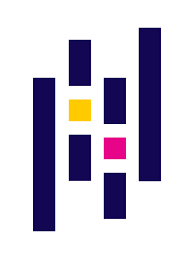)](#) [![](https://img.shields.io/badge/sklearn-white?logo=scikit-learn)](#) [![](https://img.shields.io/badge/Google-white?logo=mlflow)](#) [![](https://img.shields.io/badge/Optuna-white?logo=)](#) [![](https://img.shields.io/badge/Dagshub-white?logo=)](#) [![](https://img.shields.io/badge/CatBoost-white?logo=)](#) [![](https://img.shields.io/badge/LightGBM-white?logo=)](#) [![](https://img.shields.io/badge/Xgboost-white?logo=)](#)

Skills developed: Supervised learning (LightGBM, CatBoost, Xgboost), Model optimization 


## 0. Imports

### Packages Installation

In [55]:
!pip install pandas
!pip install mlflow dagshub
!pip install sklearn
!pip install optuna
!pip install xgboost
!pip install seaborn
!pip install catboost
!pip install lightgbm
!pip install session_info

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/19.0 MB ? eta -:--:--

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/19.0 MB 73.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 16.7/19.0 MB 198.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 19.0/19.0 MB 185.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 73.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 40.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 33.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 19.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 32.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 40.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 18.6 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 48.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 51.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 13.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 39.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 58.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 15.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 33.5 MB/s eta 0:00:00


 \

 done
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10486 sha256=47c2ea56c44508ed858b8b6f8e9d8fd2eaf8a5eaeaf3c22fd1bfe2da8a119b16
  Stored in directory: /srv/noteable/.cache/pip/wheels/d5/60/5d/807081f971b004ab5c86eba746c6b5e72d0258215bf2425d68
Successfully built fusepy


  Attempting uninstall: rich
    Found existing installation: rich 13.2.0
    Uninstalling rich-13.2.0:
      Successfully uninstalled rich-13.2.0


  Attempting uninstall: blinker
    Found existing installation: blinker 1.5
    Uninstalling blinker-1.5:
      Successfully uninstalled blinker-1.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
noteable 2.0.0 requires rich==13.2.0, but you have rich 13.1.0 which is incompatible.


  Preparing metadata (setup.py) ... -

 done


 \

 done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=aa73196ead88e30dec1de5adcfedd7aee29c9ac64116c45410bda6beafc4b25c
  Stored in directory: /srv/noteable/.cache/pip/wheels/9e/9e/4c/184e84f4ce918378a9ec9adafd1b6b73bea45f0a4a7855b6ce
Successfully built sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/409.6 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 32.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/297.1 MB ? eta -:--:--

     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/297.1 MB 150.0 MB/s eta 0:00:02

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/297.1 MB 164.4 MB/s eta 0:00:02

     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/297.1 MB 198.4 MB/s eta 0:00:02

     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/297.1 MB 190.9 MB/s eta 0:00:02

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/297.1 MB 270.6 MB/s eta 0:00:01

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/297.1 MB 206.1 MB/s eta 0:00:02

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/297.1 MB 142.7 MB/s eta 0:00:02

     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/297.1 MB 220.9 MB/s eta 0:00:01

     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/297.1 MB 272.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 106.2/297.1 MB 228.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 112.5/297.1 MB 177.7 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 127.4/297.1 MB 213.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 136.0/297.1 MB 251.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 148.9/297.1 MB 194.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 153.8/297.1 MB 157.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 159.9/297.1 MB 160.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 170.9/297.1 MB 212.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 175.3/297.1 MB 134.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 186.1/297.1 MB 155.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 192.3/297.1 MB 177.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 206.6/297.1 MB 230.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 216.3/297.1 MB 278.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 234.7/297.1 MB 254.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 244.8/297.1 MB 282.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 252.7/297.1 MB 236.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 266.9/297.1 MB 198.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 276.0/297.1 MB 254.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 288.2/297.1 MB 184.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 295.6/297.1 MB 216.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 217.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/98.7 MB ? eta -:--:--

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/98.7 MB 128.9 MB/s eta 0:00:01

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/98.7 MB 176.9 MB/s eta 0:00:01

     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/98.7 MB 222.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/98.7 MB 202.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 46.5/98.7 MB 186.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 54.6/98.7 MB 220.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 66.6/98.7 MB 166.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 71.2/98.7 MB 129.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 84.7/98.7 MB 195.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 93.3/98.7 MB 235.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 211.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 15.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.1 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 106.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 106.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 106.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 106.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.8 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 71.7/79.8 kB 57.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 71.7/79.8 kB 57.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 782.1 kB/s eta 0:00:00


 \

 |

 done
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=626502a00e9ec4bf431149d732733f94a1dc9958628d496ec51010a9601b525e
  Stored in directory: /srv/noteable/.cache/pip/wheels/d4/fc/2e/00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session_info


### Load packages

In [57]:
# EDA
import pandas as pd
import seaborn as sns

from scipy import stats

# Optimisation and ML follow
import dagshub
import mlflow
import optuna
from optuna.integration.mlflow import MLflowCallback

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn import metrics

import xgboost as xgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import session_info

In [35]:
dagshub.init("horse_health_prediction_project", "petoulemonde", mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=a9d7c1c0-fd10-4470-be55-030ef71fe29d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=cc7fced10256e5969eedba7dc52bcd2ff4cc1d940199b39d603a7dcf9a919cb2




Repository initialized!

## 1. Load datasets

In [36]:
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
total_df = pd.concat([train_df, test_df], ignore_index = True)

print('The shape of the train data:', train_df.shape)
print('The shape of the test data:', test_df.shape)
print('The shape of the total data:', total_df.shape)

The shape of the train data: (1235, 29)
The shape of the test data: (824, 28)
The shape of the total data: (2059, 29)


## 2. EDA

In [37]:
categorical_mask = (total_df.dtypes == 'object')
categorical_columns = total_df.columns[categorical_mask].tolist()

numerical_mask = (total_df.dtypes != 'object')
numerical_columns = total_df.columns[numerical_mask].tolist()

### Numeric description

In [38]:
print("No. of Rows: \t\t", total_df.shape[0])
print("No. of Columns: \t", total_df.shape[1])
print(total_df.info())

No. of Rows: 		 2059
No. of Columns: 	 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    2059 non-null   object 
 8   peripheral_pulse       2059 non-null   object 
 9   mucous_membrane        2059 non-null   object 
 10  capillary_refill_time  2059 non-null   object 
 11  pain                   2059 non-null   object 
 12  peristalsis            2059 non-null   object 
 13  abdominal_distention   2059 non-null   object 
 14  nasogastric_tu

In [39]:
print(total_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    2059 non-null   object 
 8   peripheral_pulse       2059 non-null   object 
 9   mucous_membrane        2059 non-null   object 
 10  capillary_refill_time  2059 non-null   object 
 11  pain                   2059 non-null   object 
 12  peristalsis            2059 non-null   object 
 13  abdominal_distention   2059 non-null   object 
 14  nasogastric_tube       2059 non-null   object 
 15  naso

In [40]:
print("Numerical columns only : ")
print(total_df[numerical_columns].describe().T)

Numerical columns only : 
                        count          mean           std       min       25%  \
id                     2059.0  1.029000e+03  5.945264e+02       0.0     514.5   
hospital_number        2059.0  1.016073e+06  1.441049e+06  521399.0  528800.0   
rectal_temp            2059.0  3.821914e+01  7.873780e-01      35.4      37.8   
pulse                  2059.0  7.983633e+01  2.912578e+01      30.0      54.0   
respiratory_rate       2059.0  3.032054e+01  1.685000e+01       8.0      18.0   
nasogastric_reflux_ph  2059.0  4.432977e+00  1.916504e+00       1.0       2.0   
packed_cell_volume     2059.0  4.938669e+01  1.050238e+01      23.0      43.0   
total_protein          2059.0  2.115119e+01  2.656672e+01       3.5       6.6   
abdomo_protein         2059.0  3.309136e+00  1.569174e+00       0.1       2.0   
lesion_1               2059.0  3.783395e+03  5.308602e+03       0.0    2205.0   
lesion_2               2059.0  1.372365e+01  1.950135e+02       0.0       0.0   
le

In [41]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    return sum

print(summary(total_df))

                        dtypes  missing#  missing%  uniques  count
id                       int64         0  0.000000     2059   2059
surgery                 object         0  0.000000        2   2059
age                     object         0  0.000000        2   2059
hospital_number          int64         0  0.000000      271   2059
rectal_temp            float64         0  0.000000       43   2059
pulse                  float64         0  0.000000       51   2059
respiratory_rate       float64         0  0.000000       42   2059
temp_of_extremities     object        74  0.035940        4   1985
peripheral_pulse        object       107  0.051967        4   1952
mucous_membrane         object        34  0.016513        6   2025
capillary_refill_time   object        12  0.005828        3   2047
pain                    object        73  0.035454        7   1986
peristalsis             object        39  0.018941        5   2020
abdominal_distention    object        45  0.021855        4   

### Graphic description

In [42]:
print(total_df.hist())

[[<AxesSubplot: title={'center': 'id'}>
  <AxesSubplot: title={'center': 'hospital_number'}>
  <AxesSubplot: title={'center': 'rectal_temp'}>]
 [<AxesSubplot: title={'center': 'pulse'}>
  <AxesSubplot: title={'center': 'respiratory_rate'}>
  <AxesSubplot: title={'center': 'nasogastric_reflux_ph'}>]
 [<AxesSubplot: title={'center': 'packed_cell_volume'}>
  <AxesSubplot: title={'center': 'total_protein'}>
  <AxesSubplot: title={'center': 'abdomo_protein'}>]
 [<AxesSubplot: title={'center': 'lesion_1'}>
  <AxesSubplot: title={'center': 'lesion_2'}>
  <AxesSubplot: title={'center': 'lesion_3'}>]]


In [43]:
print("Total df : ")
print(sns.pairplot(total_df, hue = "outcome", corner = True))

Total df : 


In [44]:
sns.heatmap(total_df[numerical_columns].corr(), annot = True, cmap='Blues', fmt='.2f')

<AxesSubplot: >

## 3. Features engineering

In [45]:
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    
    if p < significance_level:
        print(f'\033[32m{input_var} has a significant relationship with the target variable.\033[0m') 
    else:
        print(f'\033[31m{input_var} does not have a significant relationship with the target variable.\033[0m')  

for i in train_df.drop("outcome", axis=1).columns.tolist():
    chi_squared_test(train_df, 
                     i, 
                     "outcome")

id does not have a significant relationship with the target variable.
surgery has a significant relationship with the target variable.
age has a significant relationship with the target variable.
hospital_number has a significant relationship with the target variable.
rectal_temp has a significant relationship with the target variable.
pulse has a significant relationship with the target variable.
respiratory_rate has a significant relationship with the target variable.
temp_of_extremities has a significant relationship with the target variable.
peripheral_pulse has a significant relationship with the target variable.
mucous_membrane has a significant relationship with the target variable.
capillary_refill_time has a significant relationship with the target variable.
pain has a significant relationship with the target variable.
peristalsis has a significant relationship with the target variable.
abdominal_distention has a significant relationship with the target variable.
nasogastric_t

In [46]:
total_df = total_df.drop(["id", "lesion_3"], axis = 1)
print(total_df.columns)

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'cp_data',
       'outcome'],
      dtype='object')


In [47]:
# Preprocessing extracted for : https://www.kaggle.com/code/yaaangzhou/pg-s3-e22-eda-modeling#3.-Preprocessing-and-Features-Selections
# Data preprocessing, code sourse: https://www.kaggle.com/code/mattop/ps-s3-e22-xgboost-preprocessing
def preprocessing(df, le_cols, ohe_cols):
    
    # Label Encoding for binary cols
    le = LabelEncoder()    
    for col in le_cols:
        df[col] = le.fit_transform(df[col])
    
    # OneHot Encoding for category cols
    df = pd.get_dummies(df, columns = ohe_cols)
    
    df["pain"] = df["pain"].replace('slight', 'moderate')
    df["peristalsis"] = df["peristalsis"].replace('distend_small', 'normal')
    df["rectal_exam_feces"] = df["rectal_exam_feces"].replace('serosanguious', 'absent')
    df["nasogastric_reflux"] = df["nasogastric_reflux"].replace('slight', 'none')
        
    df["temp_of_extremities"] = df["temp_of_extremities"].fillna("normal").map({'cold': 0, 'cool': 1, 'normal': 2, 'warm': 3})
    df["peripheral_pulse"] = df["peripheral_pulse"].fillna("normal").map({'absent': 0, 'reduced': 1, 'normal': 2, 'increased': 3})
    df["capillary_refill_time"] = df["capillary_refill_time"].fillna("3").map({'less_3_sec': 0, '3': 1, 'more_3_sec': 2})
    df["pain"] = df["pain"].fillna("depressed").map({'alert': 0, 'depressed': 1, 'moderate': 2, 'mild_pain': 3, 'severe_pain': 4, 'extreme_pain': 5})
    df["peristalsis"] = df["peristalsis"].fillna("hypomotile").map({'hypermotile': 0, 'normal': 1, 'hypomotile': 2, 'absent': 3})
    df["abdominal_distention"] = df["abdominal_distention"].fillna("none").map({'none': 0, 'slight': 1, 'moderate': 2, 'severe': 3})
    df["nasogastric_tube"] = df["nasogastric_tube"].fillna("none").map({'none': 0, 'slight': 1, 'significant': 2})
    df["nasogastric_reflux"] = df["nasogastric_reflux"].fillna("none").map({'less_1_liter': 0, 'none': 1, 'more_1_liter': 2})
    df["rectal_exam_feces"] = df["rectal_exam_feces"].fillna("absent").map({'absent': 0, 'decreased': 1, 'normal': 2, 'increased': 3})
    df["abdomen"] = df["abdomen"].fillna("distend_small").map({'normal': 0, 'other': 1, 'firm': 2,'distend_small': 3, 'distend_large': 4})
    df["abdomo_appearance"] = df["abdomo_appearance"].fillna("serosanguious").map({'clear': 0, 'cloudy': 1, 'serosanguious': 2})
    
    # Imputer 
    cols_with_nan = df.drop("outcome",axis=1).columns[df.drop("outcome",axis=1).isna().any()].tolist()
    for feature in cols_with_nan:
        df[feature].fillna(df[feature].mode()[0], inplace=True)
     
    return df  

total_df = preprocessing(total_df, le_cols = ["surgery", "age", "surgical_lesion", "cp_data"], ohe_cols = ["mucous_membrane"])

In [48]:
categorical_mask = (total_df.dtypes == 'object')
categorical_columns = total_df.columns[categorical_mask].tolist()

le_transformer = ColumnTransformer(
    [('le', LabelEncoder(), categorical_columns)],
    remainder = 'passthrough')

for i in categorical_columns : 
    total_df[i] = LabelEncoder().fit_transform(total_df[i])

display(total_df.head())

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,...,lesion_1,lesion_2,cp_data,outcome,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
0,1,0,530001,38.1,132.0,24.0,1,1,2,1,...,2209,0,0,0,False,False,True,False,False,False
1,1,0,533836,37.5,88.0,12.0,1,2,2,3,...,2208,0,0,1,False,False,False,False,True,False
2,1,0,529812,38.3,120.0,28.0,1,1,0,5,...,5124,0,0,2,False,False,False,False,False,True
3,1,0,5262541,37.1,72.0,30.0,0,1,2,3,...,2208,0,1,2,False,False,False,False,False,True
4,0,0,5299629,38.0,52.0,48.0,2,2,0,0,...,0,0,1,2,False,False,False,True,False,False


In [49]:
train_df = total_df[ total_df["outcome"].notna() ]
test_df = total_df[ total_df["outcome"].isna() ]

X = train_df.drop("outcome", axis = 1)
y = train_df["outcome"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Modélisation

### LightGBM

In [50]:
def objective(trial):
    params = {'n_estimators' : trial.suggest_int('n_estimators', 10, 2000),
        'random_state' : 42
        }
    
    model = LGBMClassifier(**params)

    predictions = model.fit(X_train, y_train).predict(X_val)
    
    f1_score = metrics.f1_score(y_val, predictions, average = "micro")
    
    return f1_score

mlflc = MLflowCallback(
    tracking_uri = "https://dagshub.com/petoulemonde/horse_health_prediction_project.mlflow",
    metric_name = "F1-score",
)

lightgbm_study = optuna.create_study(study_name = "lightgbm_f1_score")
lightgbm_study.optimize(objective, n_trials=10, callbacks=[mlflc])

print(lightgbm_study.best_params)
print("Bets f1_score : ", lightgbm_study.best_value)

/tmp/ipykernel_47/1303864465.py:14: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = MLflowCallback(
[I 2023-11-25 15:53:28,304] A new study created in memory with name: lightgbm_f1_score
[I 2023-11-25 15:53:46,503] Trial 0 finished with value: 0.4368932038834951 and parameters: {'n_estimators': 967}. Best is trial 0 with value: 0.4368932038834951.
[I 2023-11-25 15:54:09,465] Trial 1 finished with value: 0.4336569579288026 and parameters: {'n_estimators': 1832}. Best is trial 1 with value: 0.4336569579288026.
[I 2023-11-25 15:54:29,582] Trial 2 finished with value: 0.4352750809061488 and parameters: {'n_estimators': 1257}. Best is trial 1 with value: 0.4336569579288026.
[I 2023-11-25 15:54:51,858] Trial 3 finished with value: 0.4368932038834951 and parameters: {'n_estimators': 1511}. Best is trial 1 with value: 0.4336569579288026.
[I 2023-11-25 15:55:02,688] Trial 4 finished with value: 0.4514563106796117 and

{'n_estimators': 1046}
Bets f1_score :  0.43042071197411


### CatBoost

In [51]:
def objective(trial):
    params = {'loss_function' : 'MultiClass',
             'iterations' : trial.suggest_int('iterations', 10, 1000),
             'learning_rate' : trial.suggest_float('learning_rate', 0.00001, 0.1) ,
             'depth' : trial.suggest_int('depth', 1, 10),
             'random_strength' : trial.suggest_float('random_strenght', 0.1, 0.9),
             'bagging_temperature' : trial.suggest_float('bagging_temperature', 0.1, 0.9),
             'border_count' : 30,
             'l2_leaf_reg' : 5,
             'verbose' : False, 
             'task_type' : 'CPU'
        }
    
    model = CatBoostClassifier(**params)

    predictions = model.fit(X_train, y_train).predict(X_val)
    
    f1_score = metrics.f1_score(y_val, predictions, average = "micro")
    
    return f1_score

mlflc = MLflowCallback(
    tracking_uri = "https://dagshub.com/petoulemonde/horse_health_prediction_project.mlflow",
    metric_name = "F1-score",
)

catboost_study = optuna.create_study(study_name = "catboost_f1_score")
catboost_study.optimize(objective, n_trials=10, callbacks=[mlflc])

print(catboost_study.best_params)
print("Bets f1_score : ", catboost_study.best_value)

/tmp/ipykernel_47/3138396883.py:22: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = MLflowCallback(
[I 2023-11-25 15:56:50,082] A new study created in memory with name: catboost_f1_score
[I 2023-11-25 15:56:50,461] Trial 0 finished with value: 0.44983818770226536 and parameters: {'iterations': 97, 'learning_rate': 0.040904893281810864, 'depth': 6, 'random_strenght': 0.42297097360698377, 'bagging_temperature': 0.4082117185459291}. Best is trial 0 with value: 0.44983818770226536.
[I 2023-11-25 15:56:53,295] Trial 1 finished with value: 0.441747572815534 and parameters: {'iterations': 821, 'learning_rate': 0.07292112244473972, 'depth': 4, 'random_strenght': 0.8578110736760258, 'bagging_temperature': 0.1599232266916081}. Best is trial 1 with value: 0.441747572815534.
[I 2023-11-25 15:56:55,545] Trial 2 finished with value: 0.4190938511326861 and parameters: {'iterations': 332, 'learning_rate': 0.0595144197196054

{'iterations': 332, 'learning_rate': 0.05951441971960543, 'depth': 6, 'random_strenght': 0.868590789608487, 'bagging_temperature': 0.8073910080822365}
Bets f1_score :  0.4190938511326861


### Xgboost model

In [52]:
def objective(trial):
    params = {'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.1) ,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.01, 1)
        }
    
    model = xgb.XGBClassifier(**params)

    predictions = model.fit(X_train, y_train).predict(X_val)
    
    f1_score = metrics.f1_score(y_val, predictions, average = "micro")
    
    return f1_score

mlflc = MLflowCallback(
    tracking_uri = "https://dagshub.com/petoulemonde/horse_health_prediction_project.mlflow",
    metric_name = "F1-score",
)

xgboost_study = optuna.create_study(study_name = "xgboost_f1_score")
xgboost_study.optimize(objective, n_trials=10, callbacks=[mlflc])

print(xgboost_study.best_params)
print("Bets f1_score : ", xgboost_study.best_value)

/tmp/ipykernel_47/2567118303.py:16: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = MLflowCallback(
[I 2023-11-25 15:57:16,953] A new study created in memory with name: xgboost_f1_score
[I 2023-11-25 15:57:18,902] Trial 0 finished with value: 0.4174757281553398 and parameters: {'max_depth': 6, 'learning_rate': 0.09967933640649601, 'n_estimators': 385, 'subsample': 0.45196800338443566}. Best is trial 0 with value: 0.4174757281553398.
[I 2023-11-25 15:57:25,522] Trial 1 finished with value: 0.4449838187702265 and parameters: {'max_depth': 6, 'learning_rate': 0.008805890585494852, 'n_estimators': 902, 'subsample': 0.876853728740232}. Best is trial 0 with value: 0.4174757281553398.
[I 2023-11-25 15:57:28,715] Trial 2 finished with value: 0.4320388349514563 and parameters: {'max_depth': 4, 'learning_rate': 0.06672395902820626, 'n_estimators': 533, 'subsample': 0.5970349627232917}. Best is trial 0 with value: 0.41

{'max_depth': 6, 'learning_rate': 0.09967933640649601, 'n_estimators': 385, 'subsample': 0.45196800338443566}
Bets f1_score :  0.4174757281553398


In [53]:
print("Metric used for comparison : ", xgboost_study.metric_names)

print("Xgboost best trial : ")
print(xgboost_study.best_params)
print(xgboost_study.best_value)
print("----")
print("LightGbM best trial : ")
print(lightgbm_study.best_params)
print(lightgbm_study.best_value)
print("----")
print("CatBoost best trial : ")
print(catboost_study.best_params)
print(catboost_study.best_value)

Xgboost best trial : 
{'max_depth': 6, 'learning_rate': 0.09967933640649601, 'n_estimators': 385, 'subsample': 0.45196800338443566}
0.4174757281553398
----
LightGbM best trial : 
{'n_estimators': 1046}
0.43042071197411
----
CatBoost best trial : 
{'iterations': 332, 'learning_rate': 0.05951441971960543, 'depth': 6, 'random_strenght': 0.868590789608487, 'bagging_temperature': 0.8073910080822365}
0.4190938511326861


### Conclusion

The best model is the LightGBM model, with following parameters : n_estimators = 1046. <br>
The best score obtained is 0.43042071197411.

## Session informations

In [59]:
session_info.show()

Click to view session information 
 
-----
catboost 1.2.2
dagshub 0.3.9
lightgbm 3.3.2
matplotlib 3.7.3
mlflow 2.8.1
optuna 3.4.0
pandas 2.0.3
scipy 1.11.3
seaborn 0.12.2
session_info 1.0.0
sklearn 1.2.2
xgboost 2.0.1
-----
 
 
 Click to view modules imported as dependencies 
 
PIL 9.5.0
anyio NA
appdirs 1.4.4
arrow 1.2.3
asttokens NA
attr 23.1.0
attrs 23.1.0
babel 2.12.1
backcall 0.2.0
brotli NA
certifi 2023.07.22
cffi 1.15.1
charset_normalizer 3.2.0
click 8.1.7
cloudpickle 2.2.1
colorama 0.4.6
colorlog NA
comm 0.1.4
cycler 0.12.1
cython_runtime NA
cytoolz 0.12.2
dacite NA
dask 2023.11.0
databricks_cli NA
dateutil 2.8.2
debugpy 1.6.7.post1
decorator 5.1.1
defusedxml 0.7.1
distributed 2023.11.0
entrypoints 0.4
executing 1.2.0
fastjsonschema NA
fqdn NA
fsspec 2023.10.0
git 3.1.32
gitdb 4.0.10
google NA
graphviz 0.20.1
greenlet 2.0.2
h11 0.14.0
httpcore 0.16.3
httpx 0.23.3
idna 3.4
importlib_metadata NA
ipykernel 6.25.1
ipython_genutils 0.2.0
ipywidgets 7.7.1
isoduration NA
jedi 0.19.0
jinja2 3.1.2
joblib 1.3.2
json5 NA
jsonpointer 2.0
jsonschema 4.19.0
jsonschema_specifications NA
jupyter_events 0.7.0
jupyter_server 2.10.0
jupyterlab_server 2.24.0
kiwisolver 1.4.5
locket NA
log NA
lz4 4.3.2
markupsafe 2.1.3
matplotlib_inline 0.1.6
mmh3 NA
mpl_toolkits NA
msgpack 1.0.5
nbformat 5.9.2
numexpr 2.8.7
numpy 1.24.3
overrides NA
packaging 21.3
parso 0.8.3
patsy 0.5.3
pexpect 4.8.0
pickleshare 0.7.5
pkg_resources NA
platformdirs 4.0.0
prometheus_client NA
prompt_toolkit 3.0.39
psutil 5.9.3
ptyprocess 0.7.0
pure_eval 0.2.2
pyarrow 14.0.1
pydantic 1.10.12
pydev_ipython NA
pydevconsole NA
pydevd 2.9.5
pydevd_file_utils NA
pydevd_plugins NA
pydevd_tracing NA
pygments 2.16.1
pynvml NA
pyparsing 3.1.1
pythonjsonlogger NA
pytz 2023.3
referencing NA
requests 2.31.0
rfc3339_validator 0.1.4
rfc3986 1.5.0
rfc3986_validator 0.1.1
rich NA
rpds NA
send2trash NA
setproctitle 1.3.3
simplejson 3.19.2
sitecustomize NA
six 1.16.0
smmap 5.0.0
sniffio 1.3.0
socks 1.7.1
sortedcontainers 2.4.0
sqlalchemy 2.0.20
sqlparse 0.4.4
stack_data 0.6.2
statsmodels 0.14.0
tblib 3.0.0
threadpoolctl 3.2.0
tlz 0.12.2
toolz 0.12.0
tornado 6.3.3
tqdm 4.66.1
traitlets 5.9.0
typing_extensions NA
uri_template NA
urllib3 1.26.15
wcwidth 0.2.6
webcolors 1.13
websocket 1.6.2
xxhash NA
yaml 6.0.1
zict 3.0.0
zipp NA
zmq 24.0.1
zoneinfo NA
zstandard 0.22.0
 
 <!-- seems like this ends pre, so might as well be explicit -->
 
-----
IPython 8.14.0
jupyter_client 7.4.9
jupyter_core 5.3.1
jupyterlab 4.0.8
notebook 6.5.5
-----
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
Linux-5.15.133+-x86_64-with-glibc2.31
-----
Session information updated at 2023-11-25 16:02